In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re
import numpy as np
import pandas as pd
import collections
from datetime import datetime
from wordcloud import WordCloud

version = "knu_score" #"new_dict_score"
df_pos_name = os.path.join(os.getcwd(), 'xlsx_data', '#3_'+version, f"{version+'_pos'}.xlsx")
df_neg_name = os.path.join(os.getcwd(), 'xlsx_data', '#3_'+version, f"{version+'_neg'}.xlsx")

In [2]:
df_pos = pd.read_excel(df_pos_name, index_col=0)
df_neg = pd.read_excel(df_neg_name, index_col=0)

df_sample = pd.concat([df_pos, df_neg], ignore_index=True)

df_sample['total'] = df_sample['title'].str.strip() + ".\n" + df_sample['text'].str.strip()
sample_set = pd.Series(df_sample['total'].tolist()).astype(str)

# Document 길이

In [3]:
sample_length = sample_set.astype("str").apply(len)

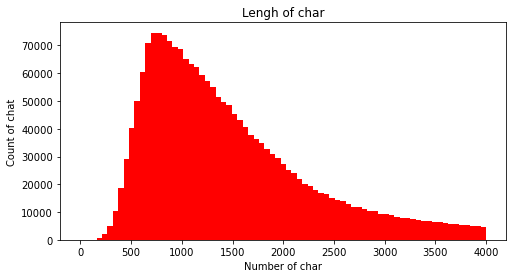

In [4]:
plt.figure(figsize=(8, 4))
plt.hist(sample_length, bins=75, range=[0, 4000], facecolor='r')
plt.title('Lengh of char')
plt.xlabel('Number of char')
plt.ylabel('Count of chat')
plt.show()

In [5]:
print(f"char 길이 최대:    {np.max(sample_length):4d}")
print(f"char 길이 최소:    {np.min(sample_length):4d}")
print(f"char 길이 평균:    {np.mean(sample_length):7.2f}")
print(f"char 길이 표준편차: {np.std(sample_length):7.2f}")

percentile25 = np.percentile(sample_length, 25)
percentile50 = np.percentile(sample_length, 50)
percentile75 = np.percentile(sample_length, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"char 25/100분위:  {percentile25:7.2f}")
print(f"char 50/100분위:  {percentile50:7.2f}")
print(f"char 75/100분위:  {percentile75:7.2f}")
print(f"char IQR:        {percentileIQR:7.2f}")
print(f"char MAX/100분위: {percentileMAX:7.2f}")

char 길이 최대:    32791
char 길이 최소:       3
char 길이 평균:    1624.83
char 길이 표준편차: 1167.32
char 25/100분위:   864.00
char 50/100분위:  1300.00
char 75/100분위:  1989.00
char IQR:        1125.00
char MAX/100분위: 3676.50


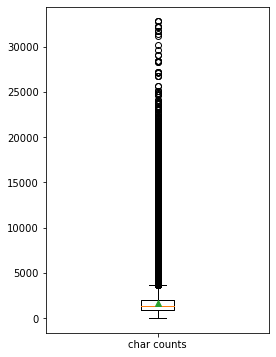

In [6]:
plt.figure(figsize=(4, 6))
plt.boxplot(sample_length, labels=['char counts'], showmeans=True)
plt.show()

# Document 단어 수

In [7]:
sample_word_counts = sample_set.astype(str).apply(lambda x:len(x.split(' ')))

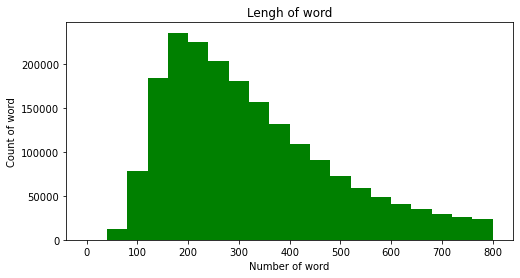

In [8]:
plt.figure(figsize=(8, 4))
plt.hist(sample_word_counts, bins=20, range=[0, 800], facecolor='g')
plt.title('Lengh of word')
plt.xlabel('Number of word')
plt.ylabel('Count of word')
plt.show()

In [9]:
print(f"word 길이 최대:    {np.max(sample_word_counts):4d}")
print(f"word 길이 최소:    {np.min(sample_word_counts):4d}")
print(f"word 길이 평균:    {np.mean(sample_word_counts):7.2f}")
print(f"word 길이 표준편차: {np.std(sample_word_counts):7.2f}")

percentile25 = np.percentile(sample_word_counts, 25)
percentile50 = np.percentile(sample_word_counts, 50)
percentile75 = np.percentile(sample_word_counts, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"word 25/100분위:  {percentile25:7.2f}")
print(f"word 50/100분위:  {percentile50:7.2f}")
print(f"word 75/100분위:  {percentile75:7.2f}")
print(f"word IQR:        {percentileIQR:7.2f}")
print(f"word MAX/100분위: {percentileMAX:7.2f}")

word 길이 최대:    7487
word 길이 최소:       1
word 길이 평균:     377.32
word 길이 표준편차:  268.60
word 25/100분위:   202.00
word 50/100분위:   303.00
word 75/100분위:   463.00
word IQR:         261.00
word MAX/100분위:  854.50


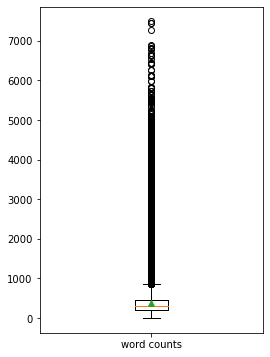

In [10]:
plt.figure(figsize=(4, 6))
plt.boxplot(sample_word_counts, labels=['word counts'], showmeans=True)
plt.show()

# 문장 길이

In [11]:
sample_sent_length = sample_set.astype(str).apply(lambda x:len(x.split('\n')))

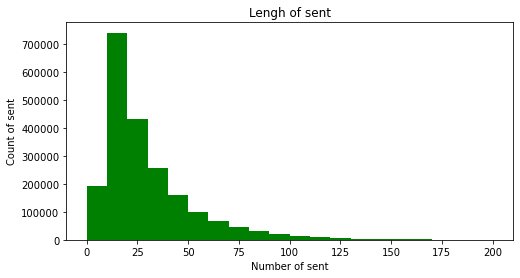

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(sample_sent_length, bins=20, range=[0, 200], facecolor='g')
plt.title('Lengh of sent')
plt.xlabel('Number of sent')
plt.ylabel('Count of sent')
plt.show()

In [13]:
print(f"word 길이 최대:    {np.max(sample_sent_length):4d}")
print(f"word 길이 최소:    {np.min(sample_sent_length):4d}")
print(f"word 길이 평균:    {np.mean(sample_sent_length):7.2f}")
print(f"word 길이 표준편차: {np.std(sample_sent_length):7.2f}")

percentile25 = np.percentile(sample_sent_length, 25)
percentile50 = np.percentile(sample_sent_length, 50)
percentile75 = np.percentile(sample_sent_length, 75)
percentileIQR = percentile75 - percentile25
percentileMAX = percentile75 + percentileIQR * 1.5
print(f"word 25/100분위:  {percentile25:7.2f}")
print(f"word 50/100분위:  {percentile50:7.2f}")
print(f"word 75/100분위:  {percentile75:7.2f}")
print(f"word IQR:        {percentileIQR:7.2f}")
print(f"word MAX/100분위: {percentileMAX:7.2f}")

word 길이 최대:    1051
word 길이 최소:       1
word 길이 평균:      29.62
word 길이 표준편차:   25.06
word 25/100분위:    14.00
word 50/100분위:    22.00
word 75/100분위:    37.00
word IQR:          23.00
word MAX/100분위:   71.50


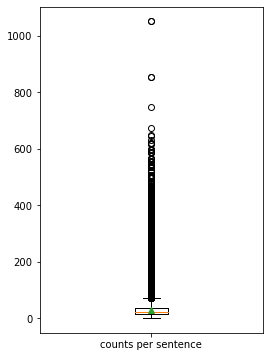

In [14]:
plt.figure(figsize=(4, 6))
plt.boxplot(sample_sent_length, labels=['counts per sentence'], showmeans=True)
plt.show()

# WordCloud

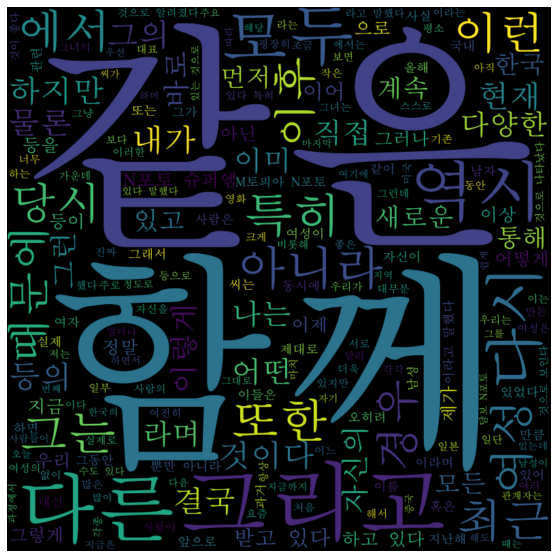

In [15]:
import gc
del df_pos, df_neg, df_sample, sample_length, sample_word_counts, sample_sent_length
gc.collect()

sample_chat = [chat for i, chat in enumerate(sample_set) if type(chat) is str and i%29==0]
wordcloud = WordCloud(width=800, height=800, font_path='‪C:\Windows\Fonts\HMKMM.TTF').generate(" ".join(sample_chat))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()